# Task:-

## 1. Use the state data (the state of your choice) generated in Stage II to fit a distribution (not Poisson) to the number of COVID-19 cases. (25 points)
- **[A]** `Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.`
- **[B]** `Describe the type of distribution and its statistics (eg., center, variance, skewness, kurtosis) in the report and the notebook.`
- **[C]**`Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.`

## 2. Model a Poisson distribution of COVID-19 cases and deaths of a state and compare to other five states. Describe how the Poisson modeling is different from the first modeling you did. (25 points)
- Example, number of new cases and deaths per 100,000 population.
- Hint - the parameter for a Poisson's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

## 3. Perform correlation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)
- You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.
- **[A]** `Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)`
- For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.

_________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________________

## 1. Use the state data (the state of your choice) generated in Stage II to fit a distribution (not Poisson) to the number of COVID-19 cases. (25 points)

First we import necessary library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Import the super_covid19 dataset that we created in Phase-2

In [9]:
super_covid19=pd.read_csv('super_covid19_dataframe.csv')
print("(Rows, Columns)=",super_covid19.shape)
super_covid19.head(5)

(Rows, Columns)= (3142, 2535)


,countyFIPS,County Name,State,StateFIPS,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-14_deaths,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261


Write code for filtering the dataset for below task:-
- filter the data for state data (StateFIPS=4 , StateName= 'Arizona')
- filter the data for COVID-19 cases only
- filter the data for date starts from 2020.6.1(Monday) - 2021.1.3(Sunday) from Stage II

In [11]:
state_data = super_covid19[super_covid19['StateFIPS'] == 4] 
state_data

,countyFIPS,County Name,State,StateFIPS,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-14_deaths,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths
96,4001,Apache County,AZ,4,0,0,0,0,0,0,...,608,608,608,608,608,608,608,608,608,608
97,4003,Cochise County,AZ,4,0,0,0,0,0,0,...,564,564,564,564,564,564,564,564,564,564
98,4005,Coconino County,AZ,4,0,0,0,0,0,0,...,472,472,472,472,472,472,472,472,472,472
99,4007,Gila County,AZ,4,0,0,0,0,0,0,...,379,379,379,379,379,379,379,379,379,379
100,4009,Graham County,AZ,4,0,0,0,0,0,0,...,176,176,176,176,176,176,176,176,176,176
101,4011,Greenlee County,AZ,4,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
102,4012,La Paz County,AZ,4,0,0,0,0,0,0,...,143,143,143,143,143,143,143,143,143,143
103,4013,Maricopa County,AZ,4,0,0,0,0,1,1,...,17103,17103,17103,17103,17103,17103,17103,17103,17103,17103
104,4015,Mohave County,AZ,4,0,0,0,0,0,0,...,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435
105,4017,Navajo County,AZ,4,0,0,0,0,0,0,...,902,902,902,902,902,902,902,902,902,902


In [92]:
state_data = super_covid19[super_covid19['StateFIPS'] == 4] 
#print(state_data)
state_data_filter = [col for col in state_data.columns
                   if ('_cases' in col)  and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
df=pd.concat([state_data['countyFIPS'],state_data[state_data_filter]],axis=1)
df.index=df.countyFIPS
del df['countyFIPS']
df  #dataframe with countyFIPS and its corresponding covid cases

,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,2020-06-06_cases,2020-06-07_cases,2020-06-08_cases,2020-06-09_cases,2020-06-10_cases,...,2020-12-25_cases,2020-12-26_cases,2020-12-27_cases,2020-12-28_cases,2020-12-29_cases,2020-12-30_cases,2020-12-31_cases,2021-01-01_cases,2021-01-02_cases,2021-01-03_cases
countyFIPS,,,,,,,,,,,,,,,,,,,,,
4001,1526,1569,1586,1637,1656,1692,1727,1732,1747,1811,...,6862,6862,6862,7255,7274,7336,7438,7594,7661,7758
4003,76,89,94,105,120,122,141,149,156,167,...,6122,6122,6122,7236,7259,7324,7480,7585,7673,7873
4005,1155,1173,1186,1221,1248,1267,1282,1289,1289,1310,...,9993,9993,9993,10852,10887,10982,11126,11344,11437,11691
4007,31,35,37,39,42,43,45,46,47,48,...,4005,4005,4005,4347,4361,4419,4517,4552,4596,4684
4009,32,37,38,38,39,39,40,41,42,45,...,2795,2795,2795,3137,3144,3180,3228,3287,3370,3414
4011,6,8,8,8,9,9,10,10,10,10,...,354,354,354,382,387,392,400,403,409,415
4012,79,91,91,110,149,158,181,183,189,205,...,1165,1165,1165,1347,1347,1387,1464,1523,1525,1609
4013,9937,10536,11068,11229,12091,12761,13498,14003,14374,15282,...,279885,279885,279885,309737,311242,314464,318827,325404,331233,342994
4015,403,409,422,428,447,485,500,512,513,552,...,9937,9937,9937,11799,11862,12108,12573,12892,13057,13590


Code to display countyFIPS in column and covid cases in each rows according to it's date

In [93]:
df=df.T
df

countyFIPS,4001,4003,4005,4007,4009,4011,4012,4013,4015,4017,4019,4021,4023,4025,4027
2020-06-01_cases,1526,76,1155,31,32,6,79,9937,403,1873,2382,865,330,297,1131
2020-06-02_cases,1569,89,1173,35,37,8,91,10536,409,1957,2496,909,365,300,1275
2020-06-03_cases,1586,94,1186,37,38,8,91,11068,422,1994,2627,940,438,304,1387
2020-06-04_cases,1637,105,1221,39,38,8,110,11229,428,2042,2669,948,462,307,1510
2020-06-05_cases,1656,120,1248,42,39,9,149,12091,447,2104,2883,1018,503,314,1708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30_cases,7336,7324,10982,4419,3180,392,1387,314464,12108,11196,68437,27191,5857,11101,27115
2020-12-31_cases,7438,7480,11126,4517,3228,400,1464,318827,12573,11296,69522,27649,6002,11319,27366
2021-01-01_cases,7594,7585,11344,4552,3287,403,1523,325404,12892,11559,70563,28137,6082,11530,27812
2021-01-02_cases,7661,7673,11437,4596,3370,409,1525,331233,13057,11582,71894,28482,6176,11678,28375


Code to convert above county wise data into state wise.

In [94]:
df['state_cases'] = df.sum(axis=1) # axis =1 means rows
df_state_cases=df.state_cases
df_state_cases

2020-06-01_cases     20123
2020-06-02_cases     21249
2020-06-03_cases     22220
2020-06-04_cases     22753
2020-06-05_cases     24331
                     ...  
2020-12-30_cases    512489
2020-12-31_cases    520207
2021-01-01_cases    530267
2021-01-02_cases    539148
2021-01-03_cases    556384
Name: state_cases, Length: 217, dtype: int64

Convert the above state wise COVID data into array for future calculation

In [66]:
arizona_cases_array = df_state_cases.values # Convert to array
print(arizona_cases_array)
len(arizona_cases_array)

[ 20123  21249  22220  22753  24331  25451  26889  27677  28296  29852
  31263  32918  34458  35691  36705  39097  40924  43443  46688  49798
  52390  54586  58353  59973  63030  66458  70049  73907  74532  79204
  84092  87424  91857  94553  98084 101441 105094 108614 112671 116892
 119930 122467 123824 128097 131354 134611 138523 141265 143619 145182
 148674 150609 152944 156293 160041 162003 163825 165934 168266 170798
 174010 177000 178467 179490 180498 182194 183645 185050 186103 186923
 187521 188736 189442 190791 191721 192654 193537 194005 194917 195557
 196280 196898 197872 198075 198386 199252 199459 200139 200658 201285
 201661 201835 202342 202861 203952 204679 205513 205765 205954 206044
 206541 206993 207521 208126 208512 208725 209209 209904 211625 212912
 213544 214015 214401 214841 215283 215849 216365 216820 217230 217506
 218183 218507 219212 219763 220398 220752 221070 221931 222538 223400
 224084 224970 225575 226050 226731 227635 228710 229434 230406 231147
 23186

217

### **[A]** **Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.**

Designed the histogram which show the graph of covid cases and it's count(frequency)
- The histogram can give the shape of the data, the center, and the spread of the data.

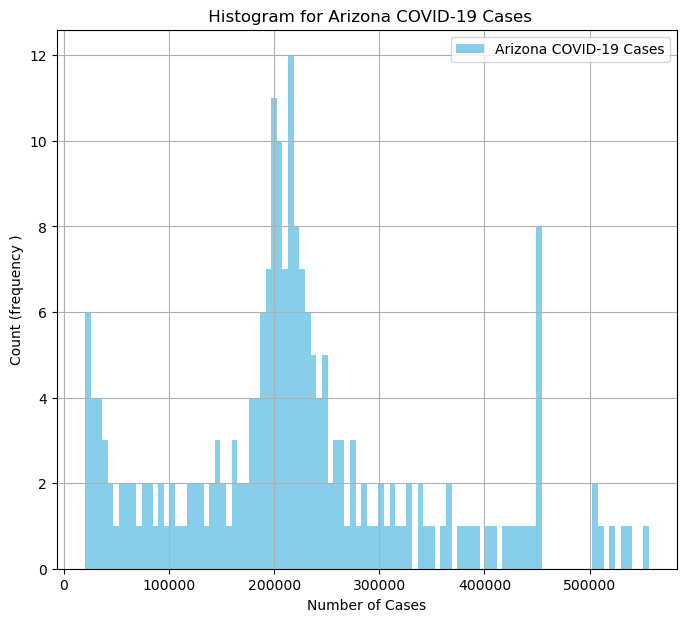

In [110]:
plt.figure(figsize=(8, 7))
plt.hist(arizona_cases_array, bins=100, density=False, color='skyblue', label='Arizona COVID-19 Cases')


# Add labels and legend
plt.title(' Histogram for Arizona COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Count (frequency )')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Probability Density Plot:-
- We have data of daily counts of new cases, which are discrete values. So we can say that our data is discrete.
- Density curve used to visualize the smoothed approximation of the distribution of discrete values. This creates a continuous-looking curve that can help understand the overall pattern of the data.
- So, the data is discrete, but the density curve is a continuous representation of its distribution.

<AxesSubplot:ylabel='Density'>

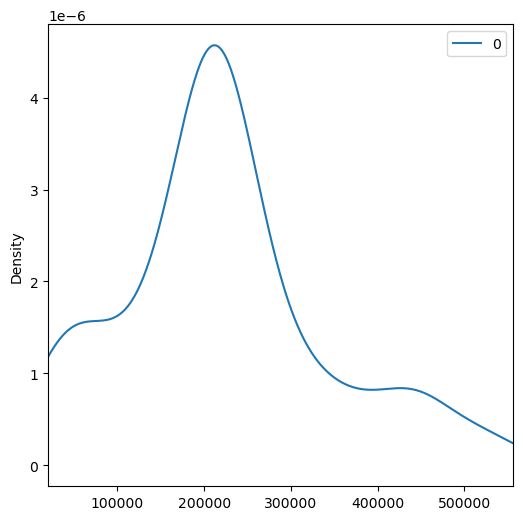

In [53]:
pd.DataFrame(arizona_cases_array).plot(kind="density",  # Plot the distribution
                               figsize=(6,6),xlim=(df_state_cases.values.min(),df_state_cases.values.max()))  #1e-6 means 1 X 10^-6

Graphically plot the distribution and try to fit a normal distribution to the number of COVID-19 cases.

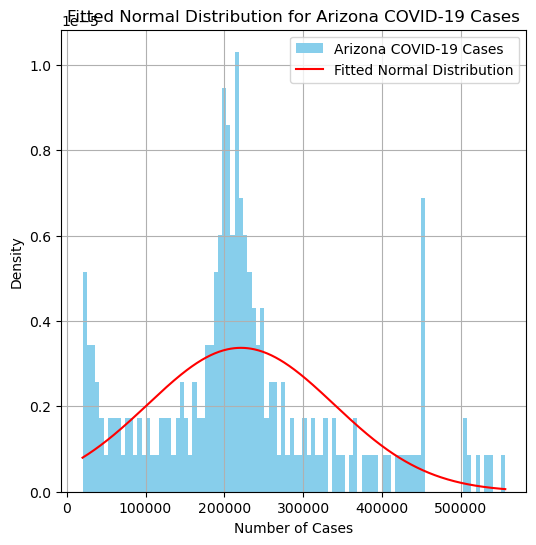

In [109]:
min_cases = df_state_cases.values.min()
max_cases = df_state_cases.values.max()
histogram_range = max_cases - min_cases

mean, std_dev = stats.norm.fit(arizona_cases_array) # Fit a normal distribution
# Create a range of values for plotting the fitted distribution
x = np.linspace(min(arizona_cases_array), max(arizona_cases_array), 500)
# Plot the histogram and fitted distribution

plt.figure(figsize=(6,6))
plt.hist(arizona_cases_array, bins=100, density=True, color='skyblue', label='Arizona COVID-19 Cases')
plt.plot(x, stats.norm.pdf(x, mean, std_dev), 'r-', label='Fitted Normal Distribution')

plt.title('Fitted Normal Distribution for Arizona COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Calculate additional statistics
variance = np.var(arizona_cases_array)
skewness = stats.skew(arizona_cases_array)
kurtosis = stats.kurtosis(arizona_cases_array)

Calculate the Probability Mass Function for the individual values and plot it.
- Calculate PMF: The PMF for each distinct case count is calculated as:
- 𝑃𝑀𝐹(𝑥)=(Frequency of 𝑥) / (Total Number of Observations)


 


In [100]:
df_state_cases=pd.DataFrame(df_state_cases) # Conver to dataframe
case_counts=df_state_cases.state_cases.value_counts()
case_counts

453597    8
20123     1
235881    1
226050    1
226731    1
         ..
190791    1
191721    1
192654    1
193537    1
556384    1
Name: state_cases, Length: 210, dtype: int64

Calculate the PMF

In [101]:
total_cases=len(df_state_cases) #217
# Calculate the PMF (probability of each case count)
pmf = case_counts / total_cases 
pmf

453597    0.036866
20123     0.004608
235881    0.004608
226050    0.004608
226731    0.004608
            ...   
190791    0.004608
191721    0.004608
192654    0.004608
193537    0.004608
556384    0.004608
Name: state_cases, Length: 210, dtype: float64

Plot the PMF for the individual values.

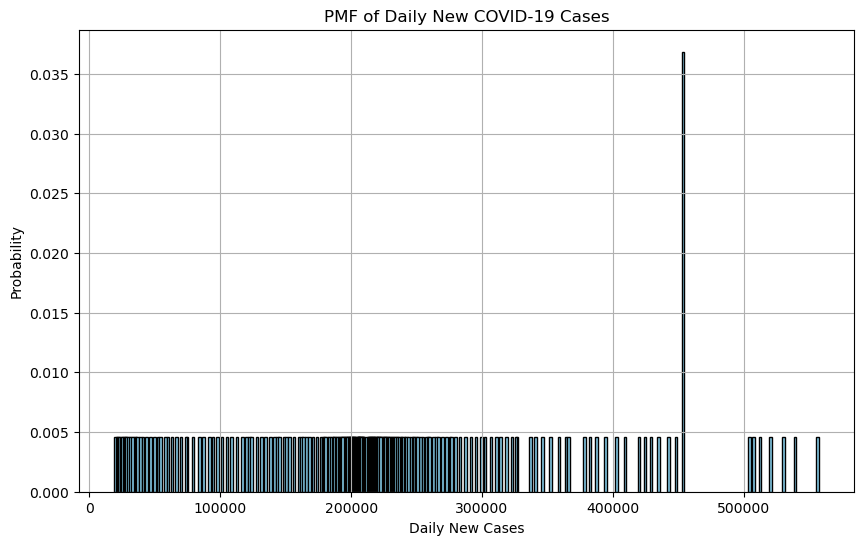

In [108]:
plt.figure(figsize=(10,6))
plt.bar(pmf.index, pmf.values, width=2000,color='skyblue', edgecolor='black')
plt.title('PMF of Daily New COVID-19 Cases')
plt.xlabel('Daily New Cases')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

### [B] Describe the type of distribution and its statistics (eg., center, variance, skewness, kurtosis) in the report and the notebook.

We can discribe the above distribution as `right-skewed continuous distribution`.

Distribution statistics:-

In [112]:
print('mean:',mean)
print('std_dev:',std_dev)
print('variance:',variance)
print('skewness:',skewness)
print('kurtosis:',kurtosis)
print('histogram_range:',histogram_range)

mean: 221013.68202764977
std_dev: 118309.84827542547
variance: 13997220198.954193
skewness: 0.5844429590341947
kurtosis: 0.2790115895818883
histogram_range: 536261


### [C]Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

Compare the distribution and its statistics to 5 other states of your choosing. 

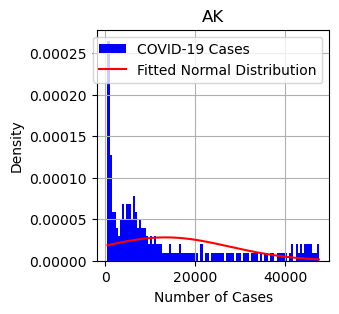

mean: 13352.52534562212
std_dev: 14189.386673045165
variance: 201338694.15719172
skewness: 1.1518453268963726
kurtosis: -0.034628467461078394
histogram_range: 46972


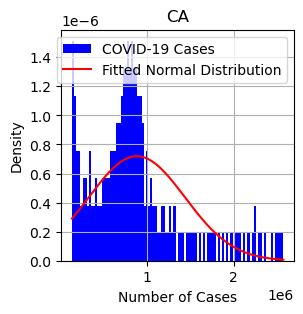

mean: 883644.9631336406
std_dev: 554753.6895998059
variance: 307751656124.5977
skewness: 1.1765055504542024
kurtosis: 1.1150816591833488
histogram_range: 2435364


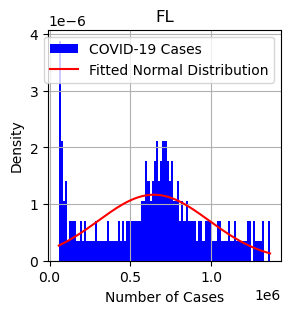

mean: 644027.9539170507
std_dev: 342517.7879546051
variance: 117318435065.31584
skewness: -0.04895640315905616
kurtosis: -0.6818726374534347
histogram_range: 1305626


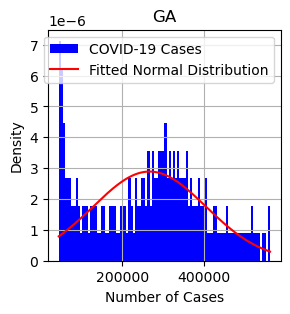

mean: 266488.7050691244
std_dev: 138047.2567307992
variance: 19057045090.89919
skewness: 0.0317078788159161
kurtosis: -0.8734370934793061
histogram_range: 517121


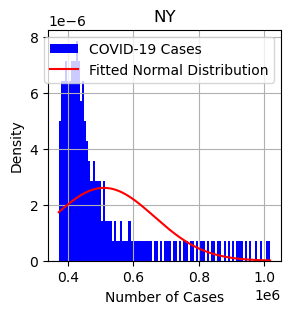

mean: 509919.83410138247
std_dev: 153409.94335022426
variance: 23534610718.71902
skewness: 1.681217112753293
kurtosis: 1.911882408874856
histogram_range: 645442


In [113]:
def data_five_states(n,state_name):
    state_data = super_covid19[super_covid19['StateFIPS'] == n] 
    state_data_filter = [col for col in state_data.columns
                   if ('_cases' in col)  and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
    df_2020=state_data.drop(['County Name','State','StateFIPS','population'],axis=1)
    df_2020=df_2020[state_data_filter]
    df=df_2020.T
    df['row_sum'] = df.sum(axis=1) # axis =1 means rows
    df_state_cases=df.row_sum
    state_cases_array = df_state_cases.values
    show_graph(state_cases_array,state_name)
    
def show_graph(state_cases_array,state_name):
    min_cases = state_cases_array.min()
    max_cases = state_cases_array.max()
    histogram_range = max_cases - min_cases

    mean, std_dev = stats.norm.fit(state_cases_array) # Fit a normal distributio
    # Create a range of values for plotting the fitted distribution
    x = np.linspace(min(state_cases_array), max(state_cases_array), 500)
    # Plot the histogram and fitted distribution

    plt.figure(figsize=(3, 3))
    plt.hist(state_cases_array, bins=100, density=True, color='b', label='COVID-19 Cases')
    plt.plot(x, stats.norm.pdf(x, mean, std_dev), 'r-', label='Fitted Normal Distribution')
    plt.title(state_name)
    plt.xlabel('Number of Cases')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Calculate additional statistics
    variance = np.var(state_cases_array)
    skewness = stats.skew(state_cases_array)
    kurtosis = stats.kurtosis(state_cases_array)
    print_statistics(mean,std_dev,variance,skewness,kurtosis,histogram_range)
    
def print_statistics(mean,std_dev,variance,skewness,kurtosis,histogram_range):
    print('mean:',mean)
    print('std_dev:',std_dev)
    print('variance:',variance)
    print('skewness:',skewness)
    print('kurtosis:',kurtosis)
    print('histogram_range:',histogram_range)

    
statefips_list = [2, 6, 12, 13, 36]
for statefips in statefips_list:
    state_name=super_covid19[super_covid19['StateFIPS'] == statefips].State.iloc[0]
    data_five_states(statefips,state_name)

Explanation of the distributions look different and what does that imply.:-
- CA and NY have more extreme data distributions with higher skewness and kurtosis, meaning they have more outliers and greater variability.
- FL and GA have more symmetric, less peaked distributions, suggesting more even spread across their data.
- AK has the smallest variability and skewness, indicating more uniform data with less outlier presence.
- States like California and Florida experienced large and fluctuating COVID-19 outbreaks, with periods of extreme case surges, as reflected in their high means, variability, and positive skewness.
- Arizona had a moderate outbreak, with some periods of increased cases, but it was more stable compared to highly impacted states like CA.
- Alaska had a much smaller outbreak, with more consistent and lower case numbers, indicated by its low mean and low variability.
- States like New York and Georgia also experienced notable outbreaks, with NY showing more extreme events, while GA had a more stable case count.

## 2. Model a Poisson distribution of COVID-19 cases and deaths of a state and compare to other five states. Describe how the Poisson modeling is different from the first modeling you did. (25 points)
- Example, number of new cases and deaths per 100,000 population.
- Hint - the parameter for a Poisson's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

## Cases:-
- Model a Poisson distribution of COVID-19 cases of a state.

In [118]:
# show the COVID cases data for Arizona state
state_data = super_covid19[super_covid19['StateFIPS'] == 4] 
#print(state_data)
state_data_filter = [col for col in state_data.columns
                   if ('_cases' in col)  and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
df_2020=state_data.drop(['County Name','State','StateFIPS','population'],axis=1)
df_2020=df_2020[state_data_filter]
df_2020.head(5)

,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,2020-06-06_cases,2020-06-07_cases,2020-06-08_cases,2020-06-09_cases,2020-06-10_cases,...,2020-12-25_cases,2020-12-26_cases,2020-12-27_cases,2020-12-28_cases,2020-12-29_cases,2020-12-30_cases,2020-12-31_cases,2021-01-01_cases,2021-01-02_cases,2021-01-03_cases
96,1526,1569,1586,1637,1656,1692,1727,1732,1747,1811,...,6862,6862,6862,7255,7274,7336,7438,7594,7661,7758
97,76,89,94,105,120,122,141,149,156,167,...,6122,6122,6122,7236,7259,7324,7480,7585,7673,7873
98,1155,1173,1186,1221,1248,1267,1282,1289,1289,1310,...,9993,9993,9993,10852,10887,10982,11126,11344,11437,11691
99,31,35,37,39,42,43,45,46,47,48,...,4005,4005,4005,4347,4361,4419,4517,4552,4596,4684
100,32,37,38,38,39,39,40,41,42,45,...,2795,2795,2795,3137,3144,3180,3228,3287,3370,3414


Poisson distribution of `Arizona` state with number of new cases per 100,000 population.

7278717
33.95170945547502


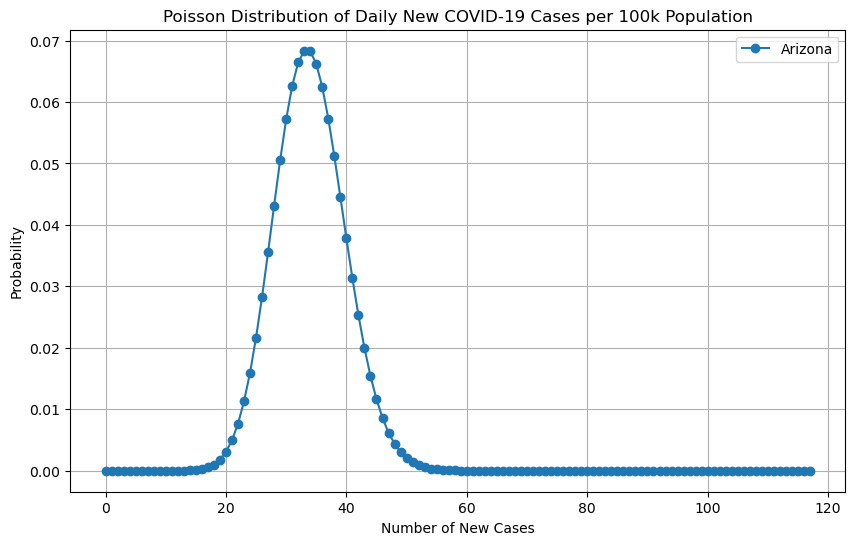

In [123]:
from scipy.stats import poisson
df_sum=df_2020.sum(axis=0)
#print(df_sum)

for i in range(1,len(df_sum)):
    df_sum[i-1]=df_sum[i]-df_sum[i-1] # calculate new cases each day
    
df_sum[len(df_sum)-1]=0
#print(df_sum)

population = state_data['population'].sum()
print(population)
lamda=(df_sum.mean()/population)*100000
print(lamda)

plt.figure(figsize=(10, 6))
x_values = np.arange(0,int(lamda * 3.5))
pmf = poisson.pmf(x_values, lamda)
plt.plot(x_values, pmf,marker='o',label='Arizona')

# Customize the plot
plt.title('Poisson Distribution of Daily New COVID-19 Cases per 100k Population')
plt.xlabel('Number of New Cases')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

Compare this distribution to other 5 states.

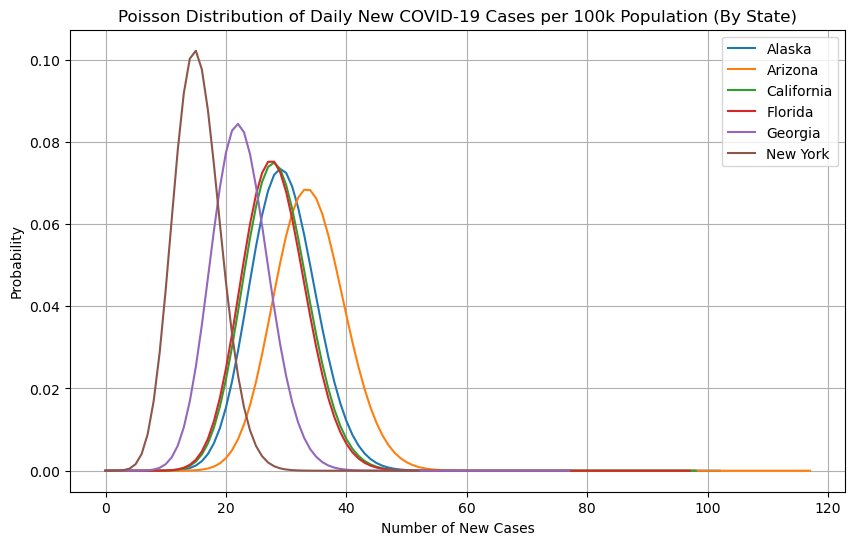

In [128]:
statefips_list = [2, 4, 6, 12, 13, 36]  # State FIPS codes
state_names = ['Alaska','Arizona', 'California', 'Florida', 'Georgia', 'New York']  # Corresponding state names

plt.figure(figsize=(10, 6)) 


for statefips, state_name in zip(statefips_list, state_names):
    # Filter the data
    state_data = super_covid19[super_covid19['StateFIPS'] == statefips]
    state_data_filter = [col for col in state_data.columns 
                         if ('_cases' in col) and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
    df_2020 = state_data.drop(['County Name', 'State', 'StateFIPS', 'population'], axis=1)
    df_2020 = df_2020[state_data_filter]
    
    # Sum up the cases across counties for each state
    df_sum = df_2020.sum(axis=0)
    
    # Calculate daily new cases
    for i in range(1, len(df_sum)):
        df_sum[i-1] = df_sum[i] - df_sum[i-1]
    df_sum[len(df_sum)-1] = 0 

    # Total population of the state
    population = state_data['population'].sum()

    # Calculate lambda (mean daily new cases per 100k population)
    lamda = (df_sum.mean() / population) * 100000

    # Plot the Poisson distribution for this state
    x_values = np.arange(0, int(lamda * 3.5))  # Set the x-axis values (0 to 3.5 * mean)
    pmf = poisson.pmf(x_values, lamda)  # Calculate Poisson PMF
    plt.plot(x_values, pmf, label=state_name)  # Plot the PMF with a label for the state

plt.title('Poisson Distribution of Daily New COVID-19 Cases per 100k Population (By State)')
plt.xlabel('Number of New Cases')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


- New York and Georgia have sharper, narrower distributions, indicating more predictable daily new cases.
- Arizona, California, and Florida have wider, more variable distributions.
- Alaska's distribution is narrow but has a slightly higher peak number of cases compared to New York and Georgia.

## Deaths:-
- Model a Poisson distribution of COVID-19 deaths of a state.

In [129]:
# show the COVID deaths data for Arizona state
state_data = super_covid19[super_covid19['StateFIPS'] == 4] 
#print(state_data)
state_data_filter = [col for col in state_data.columns
                   if ('_deaths' in col)  and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
df_2020=state_data.drop(['County Name','State','StateFIPS','population'],axis=1)
df_2020=df_2020[state_data_filter]
df_2020.head(5)

,2020-06-01_deaths,2020-06-02_deaths,2020-06-03_deaths,2020-06-04_deaths,2020-06-05_deaths,2020-06-06_deaths,2020-06-07_deaths,2020-06-08_deaths,2020-06-09_deaths,2020-06-10_deaths,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
96,39,41,45,45,46,49,49,49,49,49,...,218,218,218,225,229,231,237,244,244,244
97,3,4,4,4,4,4,4,4,4,4,...,107,107,107,119,122,126,130,136,136,136
98,81,81,85,85,85,85,85,85,85,85,...,199,199,199,205,207,208,210,214,214,214
99,0,0,0,0,0,0,0,0,0,0,...,119,119,119,126,129,132,135,136,136,136
100,0,0,0,0,0,0,0,0,2,2,...,46,46,46,48,50,50,51,51,51,51


2020-06-01_deaths     58
2020-06-02_deaths     82
2020-06-03_deaths    107
2020-06-04_deaths     79
2020-06-05_deaths     87
                    ... 
2020-12-30_deaths    291
2020-12-31_deaths    165
2021-01-01_deaths    214
2021-01-02_deaths    153
2021-01-03_deaths      0
Length: 217, dtype: int64
19453561
0.19995628312739624


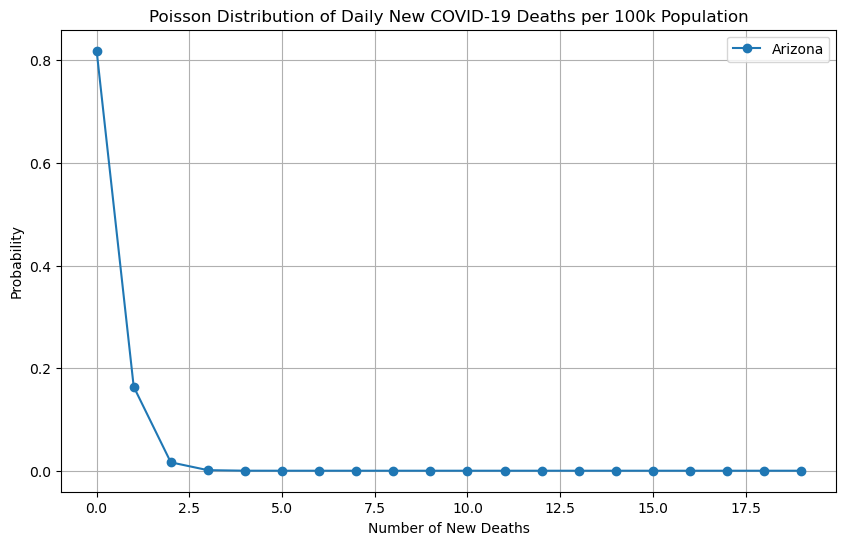

In [154]:
df_sum=df_2020.sum(axis=0)
#print(df_sum)

for i in range(1,len(df_sum)):
    df_sum[i-1]=df_sum[i]-df_sum[i-1] # calculate new deaths each day
    
df_sum[len(df_sum)-1]=0
print(df_sum)

population = state_data['population'].sum()
print(population)
lamda=(df_sum.mean()/population)*100000
print(lamda)

plt.figure(figsize=(10, 6))
x_values = np.arange(0, 20)
#print(x_values)
pmf = poisson.pmf(x_values, lamda)
plt.plot(x_values, pmf,marker='o',label='Arizona')

# Customize the plot
plt.title('Poisson Distribution of Daily New COVID-19 Deaths per 100k Population')
plt.xlabel('Number of New Deaths')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

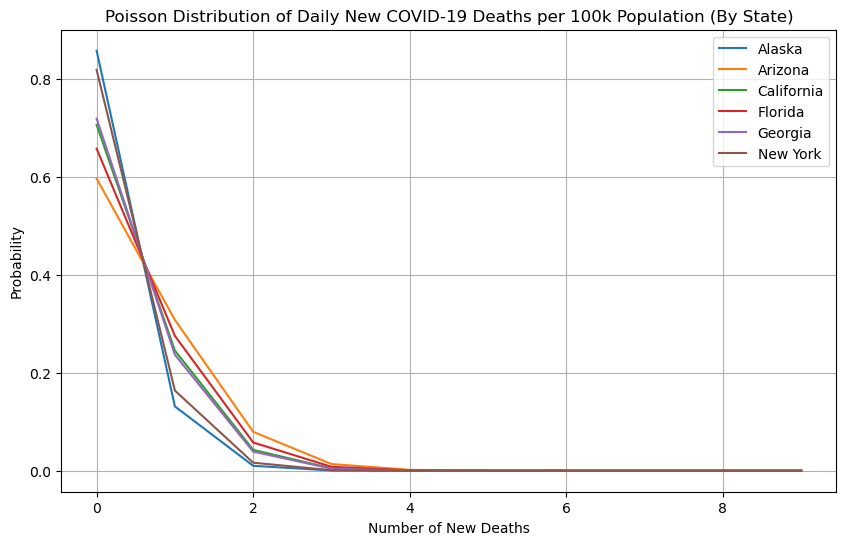

In [152]:
statefips_list = [2, 4, 6, 12, 13, 36]  # State FIPS codes
state_names = ['Alaska','Arizona', 'California', 'Florida', 'Georgia', 'New York']  # Corresponding state names

plt.figure(figsize=(10, 6)) 


for statefips, state_name in zip(statefips_list, state_names):
    # Filter the data
    state_data = super_covid19[super_covid19['StateFIPS'] == statefips]
    state_data_filter = [col for col in state_data.columns 
                         if ('_deaths' in col) and '2020-06-01' <= col.split('_')[0] <= '2021-01-03']
    df_2020 = state_data.drop(['County Name', 'State', 'StateFIPS', 'population'], axis=1)
    df_2020 = df_2020[state_data_filter]
    
    # Sum up the Deaths across counties for each state
    df_sum = df_2020.sum(axis=0)
    
    # Calculate daily new Deaths
    for i in range(1, len(df_sum)):
        df_sum[i-1] = df_sum[i] - df_sum[i-1]
    df_sum[len(df_sum)-1] = 0 

    # Total population of the state
    population = state_data['population'].sum()

    # Calculate lambda (mean daily new Deaths per 100k population)
    lamda = (df_sum.mean() / population) * 100000

    # Plot the Poisson distribution for this state
    x_values = np.arange(0, 10)  # Set the x-axis values (0 to 3.5 * mean)
    pmf = poisson.pmf(x_values, lamda)  # Calculate Poisson PMF
    plt.plot(x_values, pmf, label=state_name)  # Plot the PMF with a label for the state

plt.title('Poisson Distribution of Daily New COVID-19 Deaths per 100k Population (By State)')
plt.xlabel('Number of New Deaths')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


The Poisson distribution graph illustrates the probability of daily new COVID-19 deaths per 100k population for six states: Alaska, Arizona, California, Florida, Georgia, and New York. Here's a breakdown of the comparison among these states:

- All states show a high probability at zero daily new deaths per 100k population, which reflects days when no new deaths occurred. Alaska has the highest peak, indicating a greater number of days with no new deaths compared to other states.
- As the number of new deaths increases, the probability decreases rapidly for all states. This steep drop shows that higher numbers of new deaths per day are less likely. The decline is slightly less sharp for states like Florida and Arizona, indicating that they had more days with small but non-zero new deaths.
- **Alaska** consistently shows the highest probability at zero, suggesting the fewest number of days with daily new deaths.
- **New York** and **California** have relatively similar curves, with a higher likelihood of small numbers of daily deaths but still following the overall steep drop-off.
- **Arizona** and **Florida** tend to have a wider spread, meaning they experienced a larger variety of days with different death counts compared to the other states.
- **Georgia** has a distribution similar to New York and California but sits somewhat between Alaska and Florida in terms of spread and probabilities.

### Explanation of how the Poisson modeling is different from the first modeling I did.

### 1. **Type of Distribution**:
   - **Poisson Distribution**: 
     - **Discrete**: The Poisson distribution models the probability of a number of discrete events occurring in a fixed interval of time or space.
     - Example: Counting the number of daily new COVID-19 deaths per 100k population.
   - **Continuous Distribution**:
     - **Continuous**: A right-skewed continuous distribution models data that takes on a range of continuous values, such as waiting times, income levels, or life spans.
     - Example: Modeling the time between COVID-19 deaths or the length of hospital stays.

### 2. **Shape and Skewness**:
   - **Poisson Distribution**:
     - For smaller values of the mean (λ), the Poisson distribution is **right-skewed**, but it becomes more symmetric as λ increases.
     - The distribution shows distinct "steps" as it represents discrete probabilities for each possible count.
   - **Continuous Distribution**:
     - Always skewed to the right (tail to the right), meaning that most data points are concentrated on the left with a long tail on the right.

### Conclusion:
   - **Poisson Distribution** is best for modeling **discrete events or counts**, like the number of new COVID-19 deaths per day.
   - A **right-skewed continuous distribution** is suited for modeling **continuous data** that is heavily concentrated on smaller values but with a few extreme cases, like wait times or income levels.

## 3. Perform correlation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)

Load merge enrichment data 

In [32]:
merge_data=pd.read_csv('MergeData.csv',low_memory=False)
merge_data.head(5)

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,...,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent Margin of Error!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
0,1001,Autauga County,AL,1.0,55869.0,0.0,0.0,0.0,0.0,0.0,...,1.9,0.7,(X),(X),41959.0,(X),47.6,0.4,52.4,0.4
1,1003,Baldwin County,AL,1.0,223234.0,0.0,0.0,0.0,0.0,0.0,...,1.8,0.4,(X),(X),167986.0,(X),47.8,0.2,52.2,0.2
2,1005,Barbour County,AL,1.0,24686.0,0.0,0.0,0.0,0.0,0.0,...,1.2,0.6,(X),(X),19468.0,(X),53.2,0.2,46.8,0.2
3,1007,Bibb County,AL,1.0,22394.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.3,(X),(X),17583.0,(X),53.6,0.4,46.4,0.4
4,1009,Blount County,AL,1.0,57826.0,0.0,0.0,0.0,0.0,0.0,...,1.6,0.3,(X),(X),42978.0,(X),48.9,0.3,51.1,0.3


Select state specific data so that within that state I can compare the county based covid data to enrichment data for correlation.

In [4]:
state_merge_data=merge_data[merge_data['StateFIPS'] == 4]
col = [col for col in state_merge_data.columns
                   if ('Margin of Error' in col) ]
state_merge_data=state_merge_data.drop(col,axis=1)
state_merge_data.head(5)

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Percent!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
96,4001,Apache County,AZ,4.0,71887.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.1,0.0,1.5,0.1,1.4,(X),52078.0,49.1,50.9
97,4003,Cochise County,AZ,4.0,125922.0,0.0,0.0,0.0,0.0,0.0,...,1.9,0.3,0.1,3.2,0.4,2.8,(X),94423.0,51.2,48.8
98,4005,Coconino County,AZ,4.0,143476.0,0.0,0.0,0.0,0.0,0.0,...,1.9,0.1,0.1,2.9,0.2,2.7,(X),110158.0,48.7,51.3
99,4007,Gila County,AZ,4.0,54018.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.0,0.0,1.8,0.2,1.6,(X),42329.0,49.2,50.8
100,4009,Graham County,AZ,4.0,38837.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.1,0.1,0.9,0.0,0.9,(X),27526.0,53.9,46.1


- Calculate total cases and deaths
- Measure of center value (median or mean) to compare the number of cases and deaths.

In [5]:
dates_col = [col for col in state_merge_data.columns
                   if ('_cases' in col or '_deaths' in col) ]

cases_col = [col for col in state_merge_data.columns
                   if ('_cases' in col) ]
deaths_col = [col for col in state_merge_data.columns
                   if ('_deaths' in col) ]

df=state_merge_data.drop(dates_col,axis=1)
df['cases_total'] = state_merge_data.loc[:, cases_col].sum(axis=1)
df['cases_mean'] = state_merge_data.loc[:, cases_col].mean(axis=1)
df['deaths_total'] = state_merge_data.loc[:, deaths_col].sum(axis=1)
df['deaths_mean'] = state_merge_data.loc[:, deaths_col].mean(axis=1)
df.head(5)

,countyFIPS,County Name,State,StateFIPS,population,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Percent!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",cases_total,cases_mean,deaths_total,deaths_mean
96,4001,Apache County,AZ,4.0,71887.0,"Apache County, Arizona",71714.0,35388.0,36326.0,97.4,...,0.1,1.4,(X),52078.0,49.1,50.9,833443.0,2415.776812,32423.0,93.979710
97,4003,Cochise County,AZ,4.0,125922.0,"Cochise County, Arizona",126442.0,64371.0,62071.0,103.7,...,0.4,2.8,(X),94423.0,51.2,48.8,471249.0,1365.939130,12476.0,36.162319
98,4005,Coconino County,AZ,4.0,143476.0,"Coconino County, Arizona",142254.0,70124.0,72130.0,97.2,...,0.2,2.7,(X),110158.0,48.7,51.3,991400.0,2873.623188,31432.0,91.107246
99,4007,Gila County,AZ,4.0,54018.0,"Gila County, Arizona",53846.0,26671.0,27175.0,98.1,...,0.2,1.6,(X),42329.0,49.2,50.8,327615.0,949.608696,11243.0,32.588406
100,4009,Graham County,AZ,4.0,38837.0,"Graham County, Arizona",38304.0,20458.0,17846.0,114.6,...,0.0,0.9,(X),27526.0,53.9,46.1,217713.0,631.052174,4540.0,13.159420


Select only necessary columns to perform correlation.

In [6]:
df_copy=df.copy()
df_copy=df_copy.drop(['countyFIPS','County Name','State','StateFIPS','Geographic Area Name'],axis=1)
df_copy

,population,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,Estimate!!SEX AND AGE!!Total population!!20 to 24 years,...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Percent!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",cases_total,cases_mean,deaths_total,deaths_mean
96,71887.0,71714.0,35388.0,36326.0,97.4,4723.0,5174.0,5919.0,5776.0,4515.0,...,0.1,1.4,(X),52078.0,49.1,50.9,833443.0,2415.776812,32423.0,93.979710
97,125922.0,126442.0,64371.0,62071.0,103.7,7314.0,7944.0,7407.0,7852.0,7554.0,...,0.4,2.8,(X),94423.0,51.2,48.8,471249.0,1365.939130,12476.0,36.162319
98,143476.0,142254.0,70124.0,72130.0,97.2,7631.0,7254.0,9112.0,16981.0,16962.0,...,0.2,2.7,(X),110158.0,48.7,51.3,991400.0,2873.623188,31432.0,91.107246
99,54018.0,53846.0,26671.0,27175.0,98.1,2876.0,3104.0,2944.0,2530.0,2652.0,...,0.2,1.6,(X),42329.0,49.2,50.8,327615.0,949.608696,11243.0,32.588406
100,38837.0,38304.0,20458.0,17846.0,114.6,2763.0,2520.0,3245.0,2987.0,2720.0,...,0.0,0.9,(X),27526.0,53.9,46.1,217713.0,631.052174,4540.0,13.159420
101,9498.0,9465.0,5062.0,4403.0,115.0,734.0,683.0,772.0,734.0,821.0,...,0.0,0.8,(X),6718.0,52.4,47.6,22114.0,64.098551,384.0,1.113043
102,21108.0,21035.0,10750.0,10285.0,104.5,940.0,980.0,912.0,845.0,758.0,...,0.1,1.6,(X),16271.0,50.9,49.1,125714.0,364.388406,2961.0,8.582609
103,4485414.0,4412779.0,2181967.0,2230812.0,97.8,277315.0,285526.0,308049.0,296440.0,293079.0,...,0.2,2.5,(X),3016512.0,48.8,51.2,29977431.0,86891.104348,607703.0,1761.457971
104,212181.0,210998.0,106442.0,104556.0,101.8,9220.0,9174.0,11255.0,9944.0,9178.0,...,0.3,2.2,(X),168599.0,50.3,49.7,877206.0,2542.626087,42062.0,121.918841
105,110924.0,110271.0,55277.0,54994.0,100.5,7420.0,7831.0,8923.0,7766.0,6413.0,...,0.0,2.4,(X),79742.0,49.8,50.2,1321577.0,3830.657971,46658.0,135.240580


Find a columns with null values in all rows

In [7]:
columns_with_X = df.columns[df.isin(['(X)']).any()]
columns_with_X

Index(['Percent!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)',
       'Percent!!SEX AND AGE!!Total population!!Median age (years)',
       'Percent!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females)',
       'Percent!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females)',
       'Percent!!Total housing units'],
      dtype='object')

Drop that null columns

In [8]:
df_copy = df_copy.drop(columns=columns_with_X)
df_copy

,population,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,Estimate!!SEX AND AGE!!Total population!!20 to 24 years,...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",cases_total,cases_mean,deaths_total,deaths_mean
96,71887.0,71714.0,35388.0,36326.0,97.4,4723.0,5174.0,5919.0,5776.0,4515.0,...,1.5,0.1,1.4,52078.0,49.1,50.9,833443.0,2415.776812,32423.0,93.979710
97,125922.0,126442.0,64371.0,62071.0,103.7,7314.0,7944.0,7407.0,7852.0,7554.0,...,3.2,0.4,2.8,94423.0,51.2,48.8,471249.0,1365.939130,12476.0,36.162319
98,143476.0,142254.0,70124.0,72130.0,97.2,7631.0,7254.0,9112.0,16981.0,16962.0,...,2.9,0.2,2.7,110158.0,48.7,51.3,991400.0,2873.623188,31432.0,91.107246
99,54018.0,53846.0,26671.0,27175.0,98.1,2876.0,3104.0,2944.0,2530.0,2652.0,...,1.8,0.2,1.6,42329.0,49.2,50.8,327615.0,949.608696,11243.0,32.588406
100,38837.0,38304.0,20458.0,17846.0,114.6,2763.0,2520.0,3245.0,2987.0,2720.0,...,0.9,0.0,0.9,27526.0,53.9,46.1,217713.0,631.052174,4540.0,13.159420
101,9498.0,9465.0,5062.0,4403.0,115.0,734.0,683.0,772.0,734.0,821.0,...,0.8,0.0,0.8,6718.0,52.4,47.6,22114.0,64.098551,384.0,1.113043
102,21108.0,21035.0,10750.0,10285.0,104.5,940.0,980.0,912.0,845.0,758.0,...,1.7,0.1,1.6,16271.0,50.9,49.1,125714.0,364.388406,2961.0,8.582609
103,4485414.0,4412779.0,2181967.0,2230812.0,97.8,277315.0,285526.0,308049.0,296440.0,293079.0,...,2.7,0.2,2.5,3016512.0,48.8,51.2,29977431.0,86891.104348,607703.0,1761.457971
104,212181.0,210998.0,106442.0,104556.0,101.8,9220.0,9174.0,11255.0,9944.0,9178.0,...,2.5,0.3,2.2,168599.0,50.3,49.7,877206.0,2542.626087,42062.0,121.918841
105,110924.0,110271.0,55277.0,54994.0,100.5,7420.0,7831.0,8923.0,7766.0,6413.0,...,2.4,0.0,2.4,79742.0,49.8,50.2,1321577.0,3830.657971,46658.0,135.240580


Find the unique data type values of columns
- Result: `float` and `object` type
- Reason: To find correlation between columns we need that column values in int or float datatype

In [9]:
df_copy.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [10]:
# Display the list of columns with dtype 'object'
object_columns = df.select_dtypes(include=['O']).columns
print(object_columns)

Index(['County Name', 'State', 'Geographic Area Name',
       'Estimate!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females)',
       'Percent!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)',
       'Percent!!SEX AND AGE!!Total population!!Median age (years)',
       'Percent!!SEX AND AGE!!Total population!!18 years and over!!Sex ratio (males per 100 females)',
       'Percent!!SEX AND AGE!!Total population!!65 years and over!!Sex ratio (males per 100 females)',
       'Percent!!Total housing units'],
      dtype='object')


Convert that columns datatype into float datatype

In [13]:
df_copy = df_copy.astype(float)
df_copy.dtypes.unique()

array([dtype('float64')], dtype=object)

Now normalized the data of each county for population. 

In [14]:
# Normalization
# Apply the division to all rows in one operation
df_copy = (df_copy.div(df_copy['population'], axis=0)) * 100000
df_copy

,population,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,Estimate!!SEX AND AGE!!Total population!!20 to 24 years,...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female",cases_total,cases_mean,deaths_total,deaths_mean
96,100000.0,99759.344527,49227.259449,50532.085078,135.490422,6570.033525,7197.407042,8233.755756,8034.832445,6280.690528,...,2.086608,0.139107,1.947501,72444.252786,68.301640,70.805570,1.159379e+06,3360.519721,45102.730675,130.732553
97,100000.0,100412.954051,51119.740792,49293.213259,82.352567,5808.357555,6308.667270,5882.212798,6235.606169,5998.951732,...,2.541256,0.317657,2.223599,74985.308365,40.660091,38.754149,3.742388e+05,1084.750187,9907.720652,28.718031
98,100000.0,99148.289609,48875.073183,50273.216426,67.746522,5318.659567,5055.897851,6350.887953,11835.428922,11822.186289,...,2.021244,0.139396,1.881848,76777.997714,33.942959,35.755109,6.909866e+05,2002.859843,21907.496724,63.499991
99,100000.0,99681.587619,49374.282647,50307.304972,181.606131,5324.151209,5746.232737,5450.035173,4683.623977,4909.474620,...,3.332223,0.370247,2.961976,78360.916731,91.080751,94.042726,6.064923e+05,1757.948639,20813.432560,60.328790
100,100000.0,98627.597394,52676.571311,45951.026083,295.079435,7114.349718,6488.657723,8355.434251,7691.119293,7003.630558,...,2.317378,0.000000,2.317378,70875.711306,138.785179,118.701239,5.605814e+05,1624.873636,11689.883359,33.883720
101,100000.0,99652.558433,53295.430617,46357.127816,1210.781217,7727.942725,7190.987576,8128.026953,7727.942725,8643.925037,...,8.422826,0.000000,8.422826,70730.680143,551.695094,501.158139,2.328280e+05,674.863663,4042.956412,11.718714
102,100000.0,99654.159560,50928.557893,48725.601668,495.072958,4453.287853,4642.789464,4320.636725,4003.221527,3591.055524,...,8.053818,0.473754,7.580064,77084.517718,241.140800,232.613227,5.955751e+05,1726.304746,14027.856737,40.660454
103,100000.0,98380.640003,48645.832915,49734.807088,2.180401,6182.595408,6365.655433,6867.794143,6608.977454,6534.045687,...,0.060195,0.004459,0.055736,67251.584804,1.087971,1.141478,6.683314e+05,1937.192517,13548.426076,39.270800
104,100000.0,99442.457147,50165.660450,49276.796697,47.977906,4345.346662,4323.667058,5304.433479,4686.564773,4325.552241,...,1.178239,0.141389,1.036851,79459.989349,23.706175,23.423398,4.134234e+05,1198.328826,19823.641137,57.459829
105,100000.0,99411.308644,49833.219141,49578.089503,90.602575,6689.264722,7059.788684,8044.246511,7001.190004,5781.435938,...,2.163644,0.000000,2.163644,71888.860842,44.895604,45.256211,1.191426e+06,3453.407713,42063.034150,121.921838


Correlation Matrix

In [21]:
correlation_matrix = df_copy.corr()
print(correlation_matrix)

                                                    population  \
population                                                 NaN   
Estimate!!SEX AND AGE!!Total population                    NaN   
Estimate!!SEX AND AGE!!Total population!!Male              NaN   
Estimate!!SEX AND AGE!!Total population!!Female            NaN   
Estimate!!SEX AND AGE!!Total population!!Sex ra...         NaN   
...                                                        ...   
Percent!!CITIZEN, VOTING AGE POPULATION!!Citize...         NaN   
cases_total                                                NaN   
cases_mean                                                 NaN   
deaths_total                                               NaN   
deaths_mean                                                NaN   

                                                    Estimate!!SEX AND AGE!!Total population  \
population                                                                              NaN   
Estimate!!SEX AND

Display the correlation for enrichment data and total cases and total deaths

In [33]:
# Access the columns 'cases_total' and 'deaths_total' as a DataFrame
#result = correlation_matrix[['cases_total', 'deaths_total','cases_mean','deaths_mean']]
result = correlation_matrix[['cases_total', 'deaths_total']]

# Sort by the values of 'cases_total' and 'deaths_total'
#result = result.sort_values(by=['cases_total', 'deaths_total','cases_mean','deaths_mean'], ascending=False)
result = result.sort_values(by=['cases_total', 'deaths_total'], ascending=False)

print(result)

# Save the result to a CSV file
result.to_csv('correlation_matrix.csv')


                                                    cases_total  deaths_total
cases_total                                            1.000000      0.836768
cases_mean                                             1.000000      0.836768
deaths_mean                                            0.836768      1.000000
deaths_total                                           0.836768      1.000000
Estimate!!RACE!!Total population!!Two or more r...     0.663001      0.751393
...                                                         ...           ...
Percent!!CITIZEN, VOTING AGE POPULATION!!Citize...    -0.650993     -0.214958
Estimate!!SEX AND AGE!!Total population!!18 yea...    -0.656103     -0.492122
Estimate!!CITIZEN, VOTING AGE POPULATION!!Citiz...    -0.736402     -0.345004
Estimate!!HISPANIC OR LATINO AND RACE!!Total po...    -0.813538     -0.593272
population                                                  NaN           NaN

[178 rows x 2 columns]


Select the useful rows of coorelation matrix which help me to formulate hypothesis.  

In [34]:
result.iloc[0:20]

,cases_total,deaths_total
cases_total,1.000000,0.836768
cases_mean,1.000000,0.836768
deaths_mean,0.836768,1.000000
deaths_total,0.836768,1.000000
Estimate!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native,0.663001,0.751393
Estimate!!SEX AND AGE!!Total population!!5 to 9 years,0.568369,0.378042
Estimate!!SEX AND AGE!!Total population!!Under 18 years,0.548336,0.386383
Estimate!!SEX AND AGE!!Total population!!10 to 14 years,0.522020,0.404692
Percent!!RACE!!Total population!!Two or more races!!Black or African American and American Indian and Alaska Native,0.511534,0.620658
Estimate!!RACE!!Total population!!One race!!Some other race,0.500443,0.100857


### [A] Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)

Based on the correlation data, we can formulate hypotheses around the relationship between different enrichment variables and the number of COVID-19 cases and deaths, all normalized for population.

### Hypotheses:
   
1. **Age Groups and COVID-19 Outcomes**:
   - **Hypothesis**: Counties with a larger proportion of children (5-9 years old and under 18 years) will have fewer COVID-19 deaths per 100k population.
   - **Reasoning**: Younger populations are less likely to experience severe symptoms, which may contribute to lower mortality rates.
   
2. **Under 5 Years Population and COVID-19 Outcomes**:
   - **Hypothesis**: Counties with a higher percentage of the population under 5 years old will have fewer cases and deaths per 100k population.
   - **Reasoning**: Infants and young children are generally at lower risk of severe COVID-19 outcomes compared to older adults, though they may contribute to transmission.

3. **Female Population and COVID-19 Outcomes**:
   - **Hypothesis**: Counties with a higher proportion of females will have similar or slightly lower COVID-19 death rates compared to males.
   - **Reasoning**: Globally, men have shown a slightly higher COVID-19 death rate, though female populations may exhibit different outcomes based on cultural and socioeconomic factors.